# Data Structures and Processing

## Week 10: Time Series

### Remarks:

1. Install the libraries listed below using your package manager.  An example of installing the library `numpy` is to issue a the following command on a terminal (in Ubuntu) `python3 -m pip install numpy`.

2. Make sure that you are following the conventions.  For examples, `import numpy as np`, which imports `numpy` packages and sets the abbreviation for it.

3. Do not import the packages without the short names, unless it is intentional.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

4. We are assigning `None` to variables and use `pass` in the body of the functions, where we expect a solution from you.  Please replace these values and statements with your solution.

The exercises in this notebook are aligned with the material provided for the lecture.

### Load Libraries

In [4]:
import numpy as np
import pandas as pd
import datetime as dtime

## Task 1

Consider a file `IBM.csv` attached to this notebook, which contains stocks since 2000 of IBM.  Import the data from the file as a pandas `DataFrame` into a variable `ts1`.  Since there is no mentioning of index, therefore, the default integer incremented index is associated.  Notice that one of the column is named `"Date"`.  We would like to use this as an index for `df1`.

Your task is to use pandas builtin function to change the index of the above `DataFrame` named `df1`.

In [48]:
df1 = pd.read_csv('IBM.csv')

In [49]:
df1 = df1.set_index('Date')
df1.index = pd.to_datetime(df1.index)

In [50]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,107.492828,110.898659,106.955070,110.898659,60.474819,10823694
2000-01-04,108.986618,109.464630,105.999046,107.134323,58.422073,8606279
2000-01-05,107.970840,114.483749,107.194077,110.898659,60.474819,13318927
2000-01-06,112.810707,113.706978,108.508606,108.986618,59.432163,8338607
2000-01-07,112.093689,112.750954,105.760040,108.508606,59.171448,12402108
...,...,...,...,...,...,...
2024-04-22,182.449997,183.320007,180.449997,181.899994,181.899994,3076500
2024-04-23,182.729996,184.679993,179.000000,182.190002,182.190002,5950200
2024-04-24,183.169998,184.289993,181.399994,184.100006,184.100006,7616600


## Task 2

Reconsider the `DataFrame` named `df1` from Task 1 above.

Your task is to write down a function `average_until_months_end` that takes three arguments:

1. `df` a pandas `DataFrame` (for example, `df1`, as defined above)
2. `ts` a string containing a timestamp.
3. `col` as a column name.

and it returns the mean value along the column `col` with the range of time starting from the timestamp `ts` until the end of the month.


In [51]:
# Your solution goes here.
# Hint: Have a look at the documentation of `pd.tseries.offsets.MonthEnd`

def average_until_months_end(df, ts, col):
    ts = pd.to_datetime(ts)
    return df.loc[ts:ts + pd.tseries.offsets.MonthEnd(), col].mean()

In [52]:
average_until_months_end(df1, '2000-01-03', 'Low')

109.41682655

## Task 3

Write down a function `change_in_month` that takes three arguments:

1. `df`, the `DataFrame`,
2. `"col"`, the column name for consideration,
3. `"date"`, date as a string of the form "YYYY-mm-dd" or "YYYY/mm/dd".

that returns the difference of the values at the beginning and at the end of a particular month.

In [53]:
# Your solution goes here
def change_in_month(df, col, date):
    date = pd.to_datetime(date)
    begin_val = df.loc[date - pd.tseries.offsets.MonthBegin(), col]
    end_val = df.loc[date + pd.tseries.offsets.MonthEnd(), col]
    
    return end_val - begin_val

In [54]:
change_in_month(df1, 'High', '2000-02-03')

-7.528678999999997

## Task 4

The file `IBM.csv` has down-sampled data in it, where each record has a daily report of the `open`, `high`, `low` and `close` and other entries.

Your task is to down-sample the column `"Open"` to yearly periods reporting its `ohlc`.  Finally, plot the values for `open` and `close`.

In [60]:
df2 = df1.resample("365d")['Open'].ohlc()
df2.head()

,open,high,low,close
Date,,,,
2000-01-03,107.492828,127.210800,79.827919,83.114243
2001-01-02,80.783936,118.441681,80.066925,117.351814
2002-01-02,115.296364,119.502869,52.246655,73.709366
2003-01-02,75.334610,89.770554,71.940727,88.585083
2004-01-02,88.776291,95.659653,78.910133,94.263863


<AxesSubplot: xlabel='Date'>

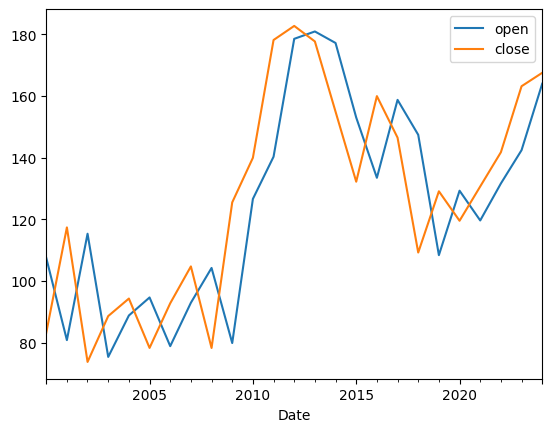

In [62]:
df2[['open', 'close']].plot()

# Task 5

Reconsider the `IBM.csv` file containing the IBM stocks values/day.  Consider a window of 1000 days and plot mean values.

<AxesSubplot: xlabel='Date'>

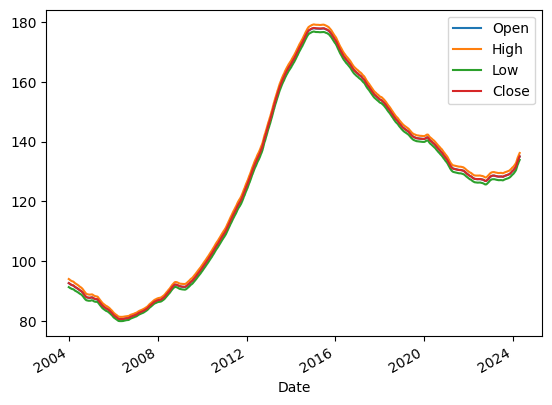

In [70]:
df1.rolling(1000).mean()[['Open', 'High', 'Low', 'Close']].plot()

## Task 6

Reconsider the `IBM.csv` file containing the IBM stocks.  Consider a smoothing factor `alpha=0.01`, and plot the `ewm` average for the column `"Open"`, and the actual values in that column.

<AxesSubplot: >

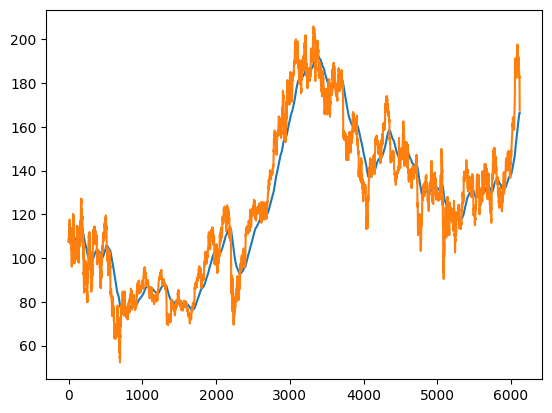

In [72]:
df.Open.ewm(alpha=0.01).mean().plot()
df.Open.plot()